In [61]:
#wahoooo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost

from scipy import stats

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

In [62]:
data = pd.read_csv("../data/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
#combine the sibsp and parch columns into a relatives column as well as keeping separate
#change the cabin column into just the first letter
#ignore ticket, name, id

In [64]:
#remember to do some of that data cleaning later

In [65]:
data["Relatives"] = data["SibSp"] + data["Parch"]
data["CabinLoc"] = data["Cabin"]
for i in data.index:
    if pd.isna(data.loc[i, "CabinLoc"]):
        pass
    else:
        data.loc[i, "CabinLoc"] = data.loc[i, "CabinLoc"][0]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,CabinLoc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,C


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Relatives    891 non-null    int64  
 13  CabinLoc     204 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [67]:
#doing hypothesis testing for feature selection

In [68]:
def create_test_table(
        data: pd.DataFrame,
        column: str
) -> pd.DataFrame:
    """
    Creates a 2x2 table for statistical analysis from a passed dataframe

    Parameters
    ----------
    data : pd.DataFrame
        The dataframe being analysed
    column : str
        The column being tested
    
    Outputs
    -------
    table : pd.DataFrame
        A 2x2 table for analysis
    """
    df = data.copy()
    df_survived = df[df["Survived"] == 1]
    df_died = df[df["Survived"] == 0]
    survived_counts = df_survived[column].value_counts()
    died_counts = df_died[column].value_counts()
    final = pd.DataFrame()
    final.loc[column + "_a", "Died"] = died_counts.iloc[0]
    final.loc[column + "_a", "Survived"] = survived_counts.iloc[0]
    final.loc[column + "_b", "Died"] = died_counts.iloc[1]
    final.loc[column + "_b", "Survived"] = survived_counts.iloc[1]
    print(final)

In [69]:
table = create_test_table(data, "Sex")
table

        Died  Survived
Sex_a  468.0     233.0
Sex_b   81.0     109.0


<Figure size 1300x1700 with 0 Axes>

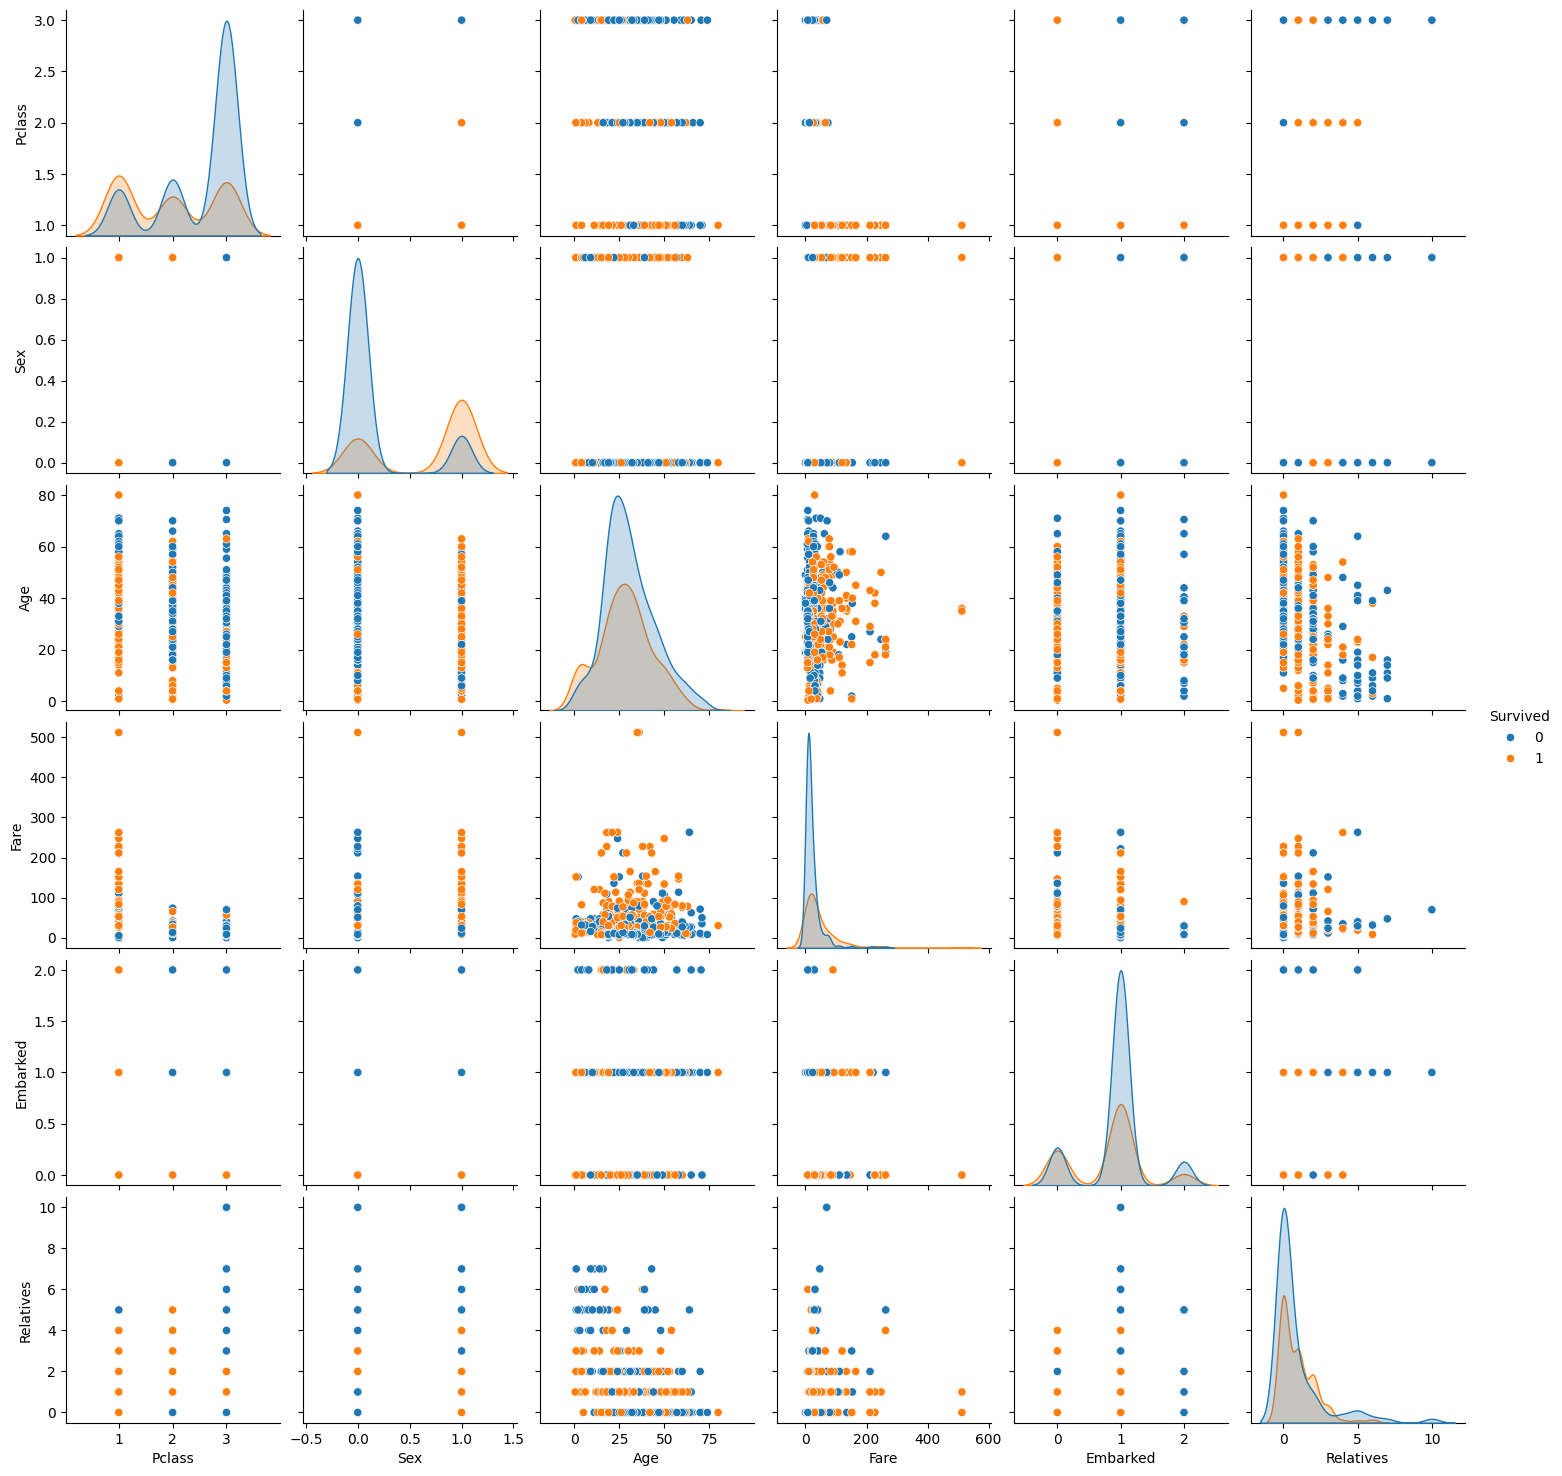

In [70]:
plt.figure(figsize=(13,17))
df = data.copy()
df = df.dropna(subset=["Sex", "Embarked"])
df.loc[:, "Sex"] = df["Sex"].apply(lambda x: 1 if x == "female" else 0)
df.loc[:, "Embarked"] = df["Embarked"].apply(lambda x: 1 if x == "S" else 2 if x == "Q" else 0)
pairs = sns.pairplot(data=df.drop(columns=["Ticket", "Name", "PassengerId", "Cabin", "SibSp", "Parch"]), hue="Survived")
plt.show()

In [71]:
#need to impute or drop missing values, scale numeric columns, optimise the hyperparameters, test the output somehow, look back at old code

In [72]:
data = data.dropna(subset=["Embarked"])
X = data.drop(columns=["Survived", "Ticket", "Name", "PassengerId", "Cabin", "SibSp", "Parch"])
y = data["Survived"]

num_cols = X.iloc[:1].select_dtypes(include=np.number).columns.to_list()
cat_cols = X.iloc[:1].select_dtypes(exclude=np.number).columns.to_list()

cat_col_trans = Pipeline(steps=[
    ("cat_col_imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("cat_col_encoder", OneHotEncoder(handle_unknown="ignore", max_categories=30, sparse_output=False))
])
num_col_trans = Pipeline(steps=[
    ("num_col_imputer", SimpleImputer(strategy="mean", add_indicator=True)),
    ("num_col_scaler", StandardScaler())
])
pipe = Pipeline(steps=[
    ("col_trans", ColumnTransformer(transformers=[
        ("cat_col_trans", cat_col_trans, cat_cols),
        ("num_col_trans", num_col_trans, num_cols)
    ], remainder="passthrough"))
])

#scores = []
#kfold = StratifiedKFold(n_splits=5)

#for train_index,test_index in kfold.split(X, y):
    #x_train = pipe.fit_transform(X.iloc[train_index], y.iloc[train_index])
    #x_test = pipe.transform(X.iloc[test_index])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8)
X_train = pipe.fit_transform(X_train, y_train)
X_test = pipe.transform(X_test)

parameters = {
    "n_estimators" : stats.randint(150, 1000),
    "learning_rate" : stats.uniform(0, 1),
    "subsample" : stats.uniform(0.3, 1),
    "max_depth" : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "colsample_bytree" : stats.uniform(0.5, 1),
    "min_child_weight" : [1, 2, 3, 4]
}

optimiser = RandomizedSearchCV(
    estimator = xgboost.XGBClassifier(objective="binary:hinge"),
    param_distributions = parameters,
    scoring = "f1",
    n_iter = 50
)

optimiser.fit(X_train, y_train)
optimiser.cv_results_
#classifier = xgboost.XGBClassifier()

c:\Users\emmas\OneDrive\Documents\code\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
195 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\emmas\OneDrive\Documents\code\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\emmas\OneDrive\Documents\code\.venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\emmas\OneDrive\Documents\code\.venv\Lib\site-packages\xgboost\sklearn.py", line 1683, in f

{'mean_fit_time': array([0.00313015, 0.00242434, 0.00283694, 0.19914908, 0.00243196,
        0.00254312, 0.19008441, 0.00262041, 0.00398674, 0.00283141,
        0.00396252, 0.00313945, 0.00354638, 0.12524824, 0.00181627,
        0.00384188, 0.00365009, 0.00322876, 0.19492521, 0.00242763,
        0.24330301, 0.1738637 , 0.00282884, 0.00395641, 0.07237124,
        0.00253081, 0.00231152, 0.00243859, 0.00251641, 0.0021318 ,
        0.00282488, 0.07482262, 0.00273361, 0.00343804, 0.00222988,
        0.00273252, 0.00222545, 0.16747947, 0.00496087, 0.00418262,
        0.10583005, 0.00323954, 0.00253205, 0.00241184, 0.00303941,
        0.00282016, 0.25368867, 0.20429502, 0.00312352, 0.00352459]),
 'std_fit_time': array([1.57460347e-03, 8.14706386e-04, 1.23522563e-03, 3.43094974e-02,
        1.26517767e-03, 5.59854213e-04, 2.12028785e-02, 5.91490642e-04,
        1.73325429e-03, 4.13395580e-04, 9.26858903e-04, 2.18204685e-04,
        1.51072672e-03, 2.44960346e-01, 5.97124612e-04, 5.21809571e-0

In [73]:
optimiser.best_params_

{'colsample_bytree': np.float64(0.7044093700554891),
 'learning_rate': np.float64(0.22250275184396673),
 'max_depth': 2,
 'min_child_weight': 3,
 'n_estimators': 428,
 'subsample': np.float64(0.9977768613748792)}

In [74]:
tuned_classifier = xgboost.XGBClassifier(objective="binary:hinge", **optimiser.best_params_)
tuned_classifier.fit(X_train, y_train)
predictions = tuned_classifier.predict(X_test)
score = f1_score(y_test, predictions)
print(f"f1 score on test data: {score}")

f1 score on test data: 0.7368421052631579
